# **Loading packages**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords

import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# **USING API FOR COMMENT EXTRACTION**


In [2]:
!pip install 'apify_client'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.4 MB/s eta 0:00:00


In [3]:

df = pd.DataFrame()

from apify_client import ApifyClient

# Initialize the ApifyClient with your API token
client = ApifyClient("apify_api_zTnShTBXWkgxZKSX3byhp7FNujsHYn2wGwP0")
posturl="https://www.facebook.com/adidasIN/posts/pfbid0qqyozpKe8HCJ8CS8V5JcDtV2mcGgfYTefT7jPMuv2Dtic2XRDEW53LGbmgNx4HXEl" 

# Prepare the Actor input
run_input = {
    "startUrls": [{ "url": posturl}],
    "resultsLimit": 50,
    "viewOption": "RANKED_UNFILTERED",
    "proxy": {
        "useApifyProxy": True,
        "apifyProxyGroups": ["RESIDENTIAL"],
    },
    "maxRequestRetries": 10,
    "persistCookiesPerSession": False,
    "useSessionPool": True,
}

# Run the Actor and wait for it to finish
run = client.actor("apify/facebook-comments-scraper").call(run_input=run_input)

# Fetch and print Actor results from the run's dataset (if there are any)
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    item=pd.DataFrame.from_dict([item])
    df=pd.concat([df,item])


In [4]:
if 'index' in df:
    df=df.drop(['index'], axis=1)
    
df=df.drop(['facebookUrl', 'id','feedbackId','profilePicture','profileId','facebookId','postTitle','profileUrl'], axis=1)
df.rename(columns = {'text':'comment'}, inplace = True)
df=df.reset_index()
df

,index,date,comment,profileName,likesCount,postPageFacebookId,attachments
0,0,2023-05-17T10:38:10.000Z,There is a lot of problem of rats in our house...,Kuldeep Godara Choudhary,1,404969166353,NaN
1,0,2022-09-20T07:10:10.000Z,"not comfortable, totally worn out and damaged ...",Milan Shah,2,404969166353,"[{'style_list': ['photo', 'fallback']}]"
2,0,2022-09-26T08:46:07.000Z,NaN,Milan Shah,2,404969166353,"[{'style_list': ['photo', 'fallback']}]"
3,0,2022-10-24T18:28:48.000Z,I cannot in good conscience purchase another A...,Lynne McKernan,15,404969166353,NaN
4,0,2022-10-25T23:42:10.000Z,"TIME TO BOYCOTT adidas, and support Kanye. Tim...",Tasha Melvin-Akins,7,404969166353,NaN
5,0,2022-10-25T10:19:28.000Z,All done with adidas. Any one or company that ...,Susan Greene Powers,1,404969166353,NaN
6,0,2022-10-25T02:09:11.000Z,Will never buy another Adidas shoe as long as ...,Amy Moses,8,404969166353,NaN
7,0,2023-02-07T12:28:30.000Z,"That’s what, adidas has delivered",Adv Yogansh Parashar,0,404969166353,"[{'style_list': ['video_inline', 'video', 'gam..."
8,0,2023-01-09T05:29:34.000Z,Had bought a pair of shoes for which the grip ...,Sweta Nathany,0,404969166353,NaN
9,0,2022-09-19T08:26:29.000Z,Love this placement,Daylyn Dsouza,17,404969166353,"[{'style_list': ['photo', 'fallback']}]"


# **Exploring Data**

**The data that i have choosen are comments from different posts of facebook.The Posts are about ChatGPT.There are 4 columns in datasets that are date,LikesCount,ProfileName and Comment.**

In [5]:
file1='/kaggle/input/chatgpt600/chatgpt600dataset (1).xlsx'
file2='/kaggle/input/chatgpt600/chatgpt594.xlsx'
file3='/kaggle/input/chatgpt600/newchatgpt163.xlsx'
file4='/kaggle/input/chatgpt600/chatgptlst.xlsx'

df1 = pd.read_excel(file1)
df2=pd.read_excel(file2)
df3=pd.read_excel(file3)
df4=pd.read_excel(file4)
df=pd.concat([df1,df2,df3,df4])

df=df.reset_index()
df=df.drop(['index'], axis=1)
df


,date,likesCount,profileName,comment
0,2023-05-25T15:32:38.000Z,61,Holly Jahangiri,"Key, here: The arms race has begun. And the ab..."
1,2023-05-26T01:23:11.000Z,4,Caitlin Suzanne,Talking with (very smart) friends the other ev...
2,2023-05-25T15:56:00.000Z,30,Melissa Baker,"I have felt the same trepidation. In my mind, ..."
3,2023-05-25T15:50:30.000Z,53,Jodi Ireland,ChatGPT and other LLMs are great assistants bu...
4,2023-05-25T15:59:53.000Z,14,Sharon Clarke,I am still holding out for sentient AI and Hol...
...,...,...,...,...
1901,2023-03-30T14:33:55.000Z,0,Marcell Mózes,Bence Somfalvi
1902,2023-03-30T14:29:48.000Z,1,Todd Walter,Bad idea
1903,2023-03-30T14:27:52.000Z,0,Matthew Lesnikoski,Send it
1904,2023-03-30T14:24:10.000Z,0,Barry Malek,Dangerous


# **Cleaning of data**
**In this section, some minor cleaning will take place.**

In [6]:

# Reset index after drop

df=df.dropna(subset=['comment']).reset_index(drop=True)
print(df.tail())

                          date  likesCount         profileName         comment
1828  2023-03-30T14:33:55.000Z           0       Marcell Mózes  Bence Somfalvi
1829  2023-03-30T14:29:48.000Z           1         Todd Walter        Bad idea
1830  2023-03-30T14:27:52.000Z           0  Matthew Lesnikoski         Send it
1831  2023-03-30T14:24:10.000Z           0         Barry Malek       Dangerous
1832  2023-03-30T14:18:31.000Z           0       Scott Thurman              No


# **Creating new Dataframe for results**

In [7]:

comm =df['comment'].tolist()
newre = pd.DataFrame({
    'Comment':[],
    'neg':[],
    'neu':[],
    'pos':[],
    'compound':[],
    'sentiment':[]
})

# **Sentiment Analysis of each comment**

**Basis of analysis**

**positive**: *compound score>=0.05*

**neutral**: *compound score between -0.05 and 0.05*

**negative**: *compound score<=-0.05*


In [8]:

for sentence in comm:
    sid = SentimentIntensityAnalyzer()   
    ss = sid.polarity_scores(str(sentence)) 
    if(ss['compound']>0.05):
        sen='Positive'
    elif((ss['compound']<0.05) and (ss['compound']>-0.05)):
        sen='Neutral'
    else:
        sen='Negative'
        
    new_row = pd.DataFrame({
    'Comment':[str(sentence)],
    'neg':[ss['neg']],
    'neu':[ss['neu']],
    'pos':[ss['pos']],
    'compound':[ss['compound']],
    'sentiment':[sen],
               })

    newre=pd.concat([newre,new_row],ignore_index=True)
df.head()
df.drop('comment', inplace=True, axis=1)



# **Combining result and original dataset.**

In [9]:

result=df.join(newre)

# **Displaying new result dataset**

In [10]:
print(result.head())

                       date  likesCount      profileName  \
0  2023-05-25T15:32:38.000Z          61  Holly Jahangiri   
1  2023-05-26T01:23:11.000Z           4  Caitlin Suzanne   
2  2023-05-25T15:56:00.000Z          30    Melissa Baker   
3  2023-05-25T15:50:30.000Z          53     Jodi Ireland   
4  2023-05-25T15:59:53.000Z          14    Sharon Clarke   

                                             Comment    neg    neu    pos  \
0  Key, here: The arms race has begun. And the ab...  0.125  0.692  0.183   
1  Talking with (very smart) friends the other ev...  0.088  0.780  0.133   
2  I have felt the same trepidation. In my mind, ...  0.000  1.000  0.000   
3  ChatGPT and other LLMs are great assistants bu...  0.034  0.835  0.131   
4  I am still holding out for sentient AI and Hol...  0.000  1.000  0.000   

   compound sentiment  
0    0.5106  Positive  
1    0.6124  Positive  
2    0.0000   Neutral  
3    0.7814  Positive  
4    0.0000   Neutral  


# **Result Dataset**

**Neutral Comment** = *Orange color*

**Negative Comment** = *Red color*

**Positive comment** = *Light Blue color*

In [11]:
#imp
result.style\
.highlight_between(left=0.1,right=1.0,subset='neg',color='Red')\
.highlight_between(left=0.1,right=1.0,subset='neu',color='Orange')\
.highlight_between(left=0.1,right=1.0,subset='pos',color='LightBlue')

result.style\
.highlight_between(left=-1.0,right=-0.1,subset='compound',color='Red')\
.highlight_between(left=0.0,right=0.0,subset='compound',color='Orange')\
.highlight_between(left=0.1,right=1.0,subset='compound',color='LightBlue')


,date,likesCount,profileName,Comment,neg,neu,pos,compound,sentiment
0,2023-05-25T15:32:38.000Z,61,Holly Jahangiri,"Key, here: The arms race has begun. And the ability already rests in the hands of bad actors: the wealthy, the evil, the disaffected malcontents. ""Regulation"" won't affect them at all. So what we need, and it's terrifying, is to keep it open and make sure it's part of the curriculum going forward. We need talented, ethical people to be working on this ""problem"" and we're already late - it's a pretty steep learning curve.",0.125000,0.692000,0.183000,0.510600,Positive
1,2023-05-26T01:23:11.000Z,4,Caitlin Suzanne,"Talking with (very smart) friends the other evening, one said, simply, “AI must be told what is appropriate.” I know it’s far deeper than this, and your post backs up their statement. Our other friend, using free apps and tutorials, a still photo of themselves, and an outline of a speech, was able to animate a full on speech using a former president’s voice. Cool, and scary. Bad and professional actors can make anyone say anything. It’s a political nightmare, at the least.",0.088000,0.780000,0.133000,0.612400,Positive
2,2023-05-25T15:56:00.000Z,30,Melissa Baker,"I have felt the same trepidation. In my mind, scifi has always been prophecy. I chose not to bring alexa into my home because I saw 2001: a space odyssey when I was a kid. I remain concerned.",0.000000,1.000000,0.000000,0.000000,Neutral
3,2023-05-25T15:50:30.000Z,53,Jodi Ireland,"ChatGPT and other LLMs are great assistants but they're not a panacea. I work in tech, and there's no way I'd trust anything they generated without reviewing it with a fine tooth comb. They make up facts & stats, they manufacture nonexistent resources, their writing level's about at 6th or 7th grade, and there's very little variety in word choice or sentence structure. I don't think the sky is falling... at least not yet and not for a while.",0.034000,0.835000,0.131000,0.781400,Positive
4,2023-05-25T15:59:53.000Z,14,Sharon Clarke,I am still holding out for sentient AI and Holodecks.,0.000000,1.000000,0.000000,0.000000,Neutral
5,2023-05-25T23:58:23.000Z,3,Mark Rutherford,One of your best posts yet. Useful information.,0.000000,0.458000,0.542000,0.796400,Positive
6,2023-05-25T17:08:07.000Z,25,Alan Polyniak,I noticed that there was no mention of Asimov’s Three Laws of Robotics which ought to be considered as the basis for any built-in safety protocols for AIs that become both very powerful and independent.,0.056000,0.793000,0.151000,0.570900,Positive
7,2023-05-26T08:05:05.000Z,7,Bob Basting,"“We need to ensure that AI systems behave as intended” WE are not that smart. WE are bound by profit and innovation, rather than the morals that should guide our desire to let technology think for us. We are doomed as a society because we desire profit over driving our own destiny as humans. It won’t be long before we become prisoners of our own making.",0.119000,0.682000,0.200000,0.685000,Positive
8,2023-05-25T19:02:07.000Z,4,Liv Burg,I remember watching metropolis in my film class and thinking wow in the early days of Hollywood they had a grim representation of what the future would be. And it's scary how accurate they actually were,0.165000,0.743000,0.091000,-0.476700,Negative
9,2023-05-25T15:53:00.000Z,39,Chris Hayes,"AI is plagiarism, and does not “create”; it merely combines in new ways what already exists.",0.000000,1.000000,0.000000,0.000000,Neutral


# **Most Frequent Words in Comments**

           Word  Frequency
0       chatgpt        113
1         human        109
2        humans         74
3          time         66
4          make         64
5  intelligence         56
6        skynet         55
7         world         49
8           gpt         46
9        things         43


<AxesSubplot: title={'center': 'Most frequent Words'}, xlabel='Frequency of words', ylabel='Words'>

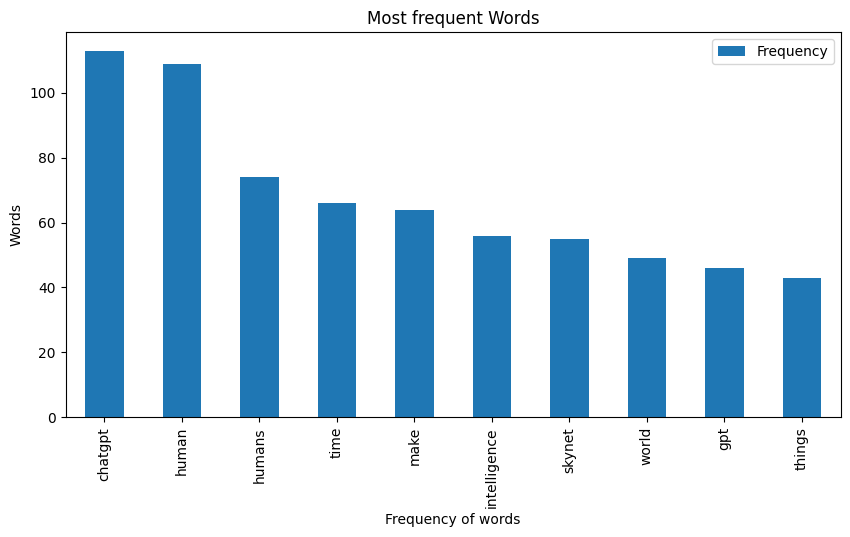

In [12]:

stop_words = stopwords.words()


def cleaning(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies              
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    return text


dt = result['Comment'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

rslt.plot(kind='bar', title='Most frequent Words', y='Frequency',
          xlabel='Frequency of words',ylabel='Words',
         x='Word', figsize=(10,5))


# **Wordcloud of Comments**

**Word clouds  are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the documents.**

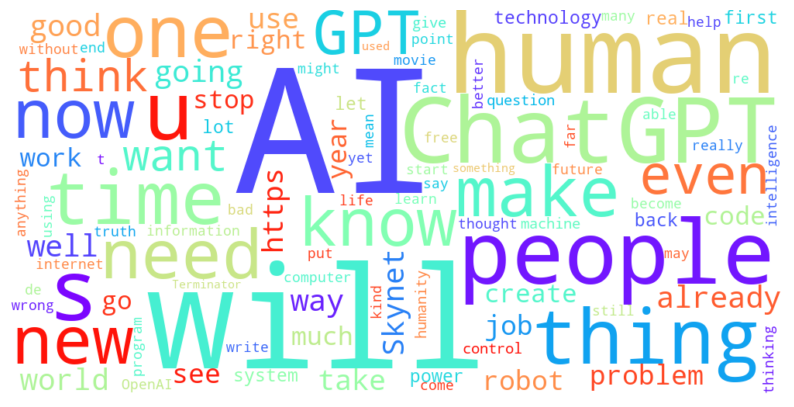

In [13]:

post_text = ' '.join(result['Comment'])
post_text = post_text.replace('\n', '') # remove blank lines characters
wordcloud = WordCloud(random_state=1,
                      width=1000,
                      height=500,
                      collocations=True, 
                      max_words=100,
                      background_color='white',
                      colormap ='rainbow',
                      contour_color='steelblue').generate(post_text)

 # Function to display word cloud img via matplotlib
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
  
plot_cloud(wordcloud)



        

    

# **Most Negative Comment :**

In [14]:
maxi=result['compound'].max()
mini=result['compound'].min()
like=result['likesCount'].max()
for i,row in result.iterrows():
    if(result['compound'][i]==mini):
        print("\n\nMost Negative Comment with Sentiment Score ",
              mini,"is : \n\n",result['Comment'][i])
        
    



Most Negative Comment with Sentiment Score  -0.9846 is : 

 Self-driving cars ARE a disappointment as they promised us a device that can navigate roads but our current level of consumer robots is roombas, not self-driving cars.

Robot valets are similarly disappointing as they often do the wrong thing and take longer than a human would, which feels cheap and lazy. If you want a valet for your motel 6 maybe it's a good option but I'd be angry if I pulled up to a 5-star and they had a robot valet.

Finally: Large language models are not intelligence, and they do not have understanding.

It's annoying that pop-sci has managed to fill everyone with fear and if you simply learn how these things work you'd be filled with disgust, instead.


# **Most Positive Comment :**

In [15]:
for i,row in result.iterrows():
    if(result['compound'][i]==maxi):
        print("\n\nMost Positive Comment with Sentiment Score ",
              maxi," is : \n \n",result['Comment'][i])




Most Positive Comment with Sentiment Score  0.9978  is : 
 
 When ChatGPT agree 

Artificial intelligence has the potential to revolutionize the way we gather and analyze information, but it is essential that we ensure that AI systems are not fed false or misleading information from the internet. In order to achieve this, we need to strive for AI models that are designed to seek out only objective and provable truth, and reject unreliable or unverified sources of information.

The individual who is working on creating an AI chatbot that is specifically focused on seeking truth and understanding the universe deserves acknowledgment for their innovative and important work. By creating an AI model that is focused on objective truth, this person is contributing to the development of more reliable and trustworthy AI systems, which will have a positive impact on many areas of our lives.

Overall, the idea of creating an AI chatbot that is focused on seeking objective and provable truth is 

# **Comment with Most no of likes :**

In [16]:
for i,row in result.iterrows():
    if(result['likesCount'][i]==like):
        print("\n\nComment with most no of likes :",
              like,"Likes \n\n",result['Comment'][i])



Comment with most no of likes : 212 Likes 

 Don't stop GPT. If you do, another AI will surpass it. You think if you stop GPT, that other AI work will just stop as well? Nope. The rich elites want GPT to stop for 6 months because they need 6 months for their AI to catch up.

You want to stop AI? Then you need to stop capitalism... Good luck


# **Count of Each Sentiment**

<AxesSubplot: title={'center': 'Sentiment'}, xlabel='type of Sentiment', ylabel='Sentiment Count'>

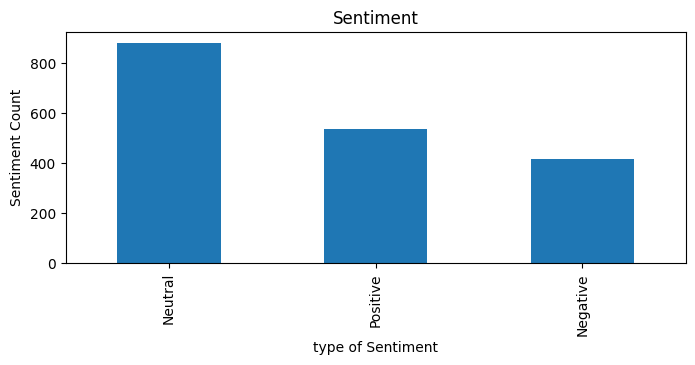

In [17]:
count=result['sentiment'].value_counts()
count.plot(kind='bar', title='Sentiment', ylabel='Sentiment Count',
         xlabel='type of Sentiment', figsize=(8,3))


<AxesSubplot: >

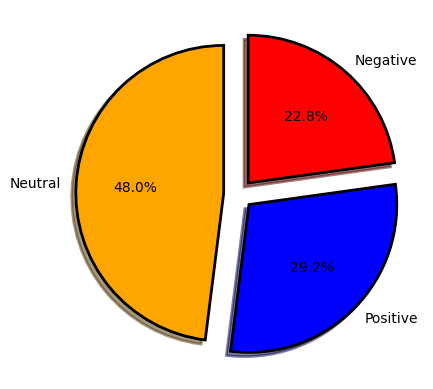

In [18]:
colors = ("orange", "blue", "red")
explode = (0.1,0.1,0.1)
wp = {'linewidth':2, 'edgecolor':"black"}
count.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')

# **Creating csv file of result set**

In [19]:
result.to_csv('/kaggle/working/ouputnewchatgpt.csv')

# **Accuracy**

In [20]:

vect = CountVectorizer(ngram_range=(1,2)).fit(result['Comment'])
X = result['Comment']
Y = result['sentiment']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=5)

print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))


from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("\ntest accuracy: {:.2f}%".format(svc_acc*100))


Size of x_train: (1466, 31947)
Size of y_train: (1466,)
Size of x_test: (367, 31947)
Size of y_test: (367,)

test accuracy: 73.02%
